In [1]:
import sys,os
import time
import h5py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig

from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.signal import periodogram,get_window,coherence,welch,csd

import matplotlib
import scipy


import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import MB_equations as MBe
import MB_analysis as MBa
import TimestreamHelperFunctions as Thf

In [2]:
## Define the runs of interest
run_dict = {"series": [
    "20220721_123409",
    "20220721_123710",
    "20220721_124011",
    "20220720_150715",
    "20220720_150540",
    "20220720_144600",
    "20220720_150408",
    "20220720_150240",
    "20220720_150108",
#     "20220720_145935",
    "20220720_144037" ] , 
            "Vled"  : [
    4.0,
    3.8,
    3.6,
    3.4,
    3.2,
    3.0,
    2.8,
    2.6,
    2.4,
#     2.2,
    2.0 ] }
n_runs = len(run_dict["series"])
run_df = pd.DataFrame(run_dict)
print("Total runs:",n_runs)

Total runs: 10


## Get the data files

In [3]:
noise_files = np.zeros(n_runs, dtype='object')
vna_files   = np.zeros(n_runs, dtype='object')
powers      = np.zeros(n_runs)
i = 0

for series in run_df['series'].to_numpy():
    data_path = os.path.join('/data/USRP_Noise_Scans',series.split('_')[0],series)
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series, verbose=False)
    metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
    powers[i]      = metadata['power']
    noise_files[i] = tone_files[0]
    vna_files[i]   = vna_file
    i += 1
    
run_df["noise path"] = noise_files
run_df["vna path"]   = vna_files
run_df["power"]      = powers
run_df

,series,Vled,noise path,vna path,power
0,20220721_123409,4.0,/data/USRP_Noise_Scans/20220721/20220721_12340...,/data/USRP_Noise_Scans/20220721/20220721_12340...,-40.0
1,20220721_123710,3.8,/data/USRP_Noise_Scans/20220721/20220721_12371...,/data/USRP_Noise_Scans/20220721/20220721_12371...,-40.0
2,20220721_124011,3.6,/data/USRP_Noise_Scans/20220721/20220721_12401...,/data/USRP_Noise_Scans/20220721/20220721_12401...,-40.0
3,20220720_150715,3.4,/data/USRP_Noise_Scans/20220720/20220720_15071...,/data/USRP_Noise_Scans/20220720/20220720_15071...,-40.0
4,20220720_150540,3.2,/data/USRP_Noise_Scans/20220720/20220720_15054...,/data/USRP_Noise_Scans/20220720/20220720_15054...,-40.0
5,20220720_144600,3.0,/data/USRP_Noise_Scans/20220720/20220720_14460...,/data/USRP_Noise_Scans/20220720/20220720_14460...,-40.0
6,20220720_150408,2.8,/data/USRP_Noise_Scans/20220720/20220720_15040...,/data/USRP_Noise_Scans/20220720/20220720_15040...,-40.0
7,20220720_150240,2.6,/data/USRP_Noise_Scans/20220720/20220720_15024...,/data/USRP_Noise_Scans/20220720/20220720_15024...,-40.0
8,20220720_150108,2.4,/data/USRP_Noise_Scans/20220720/20220720_15010...,/data/USRP_Noise_Scans/20220720/20220720_15010...,-40.0
9,20220720_144037,2.0,/data/USRP_Noise_Scans/20220720/20220720_14403...,/data/USRP_Noise_Scans/20220720/20220720_14403...,-40.0


## Noise cleaning to get cleaning coefficients

power: -40.0
Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220721/20220721_123409/USRP_Noise_20220721_123409_delta0.h5 because override=True!
found 305 pulses
chunk length plugged into welch is 500
chunked data into 1000 timestreams
computed electronics basis
cleaning...
(2, 198000)
(1, 198000)
(1, 198000)
(2, 198000)
(1, 198000)
(1, 198000)
0.010936604909406799
0.33592900861331193
saving clean_data to /data/USRP_Noise_Scans/20220721/20220721_123409/USRP_Noise_20220721_123409_delta0_cleaned.h5 because override=True!
number of chunks used to average is 396
power: -40.0
Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz lo

/home/nexus-admin/NEXUS_RF/AnalysisScripts/PyMKID_resolution_functions.py:851: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(noise_data_file + '_raw_S21')


power: -40.0
Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220720/20220720_150408/USRP_Noise_20220720_150408_delta0.h5 because override=True!
found 7 pulses
chunk length plugged into welch is 500
chunked data into 1000 timestreams
computed electronics basis
cleaning...
(2, 348000)
(1, 348000)
(1, 348000)
(2, 348000)
(1, 348000)
(1, 348000)
0.010771505728023083
0.3229708510212125
saving clean_data to /data/USRP_Noise_Scans/20220720/20220720_150408/USRP_Noise_20220720_150408_delta0_cleaned.h5 because override=True!
number of chunks used to average is 696
power: -40.0
Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  

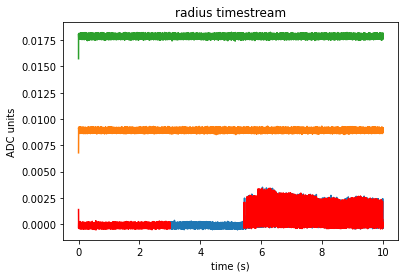

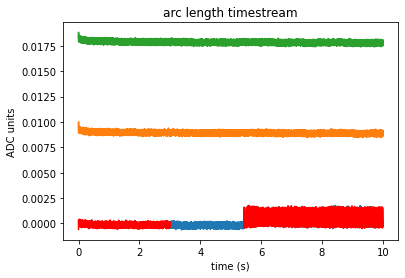

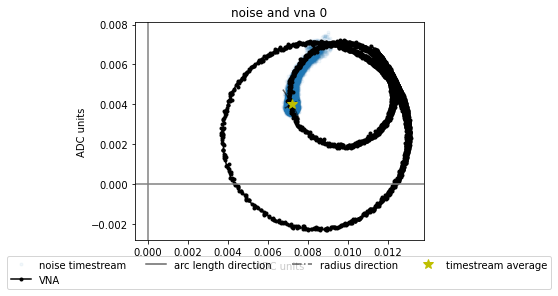

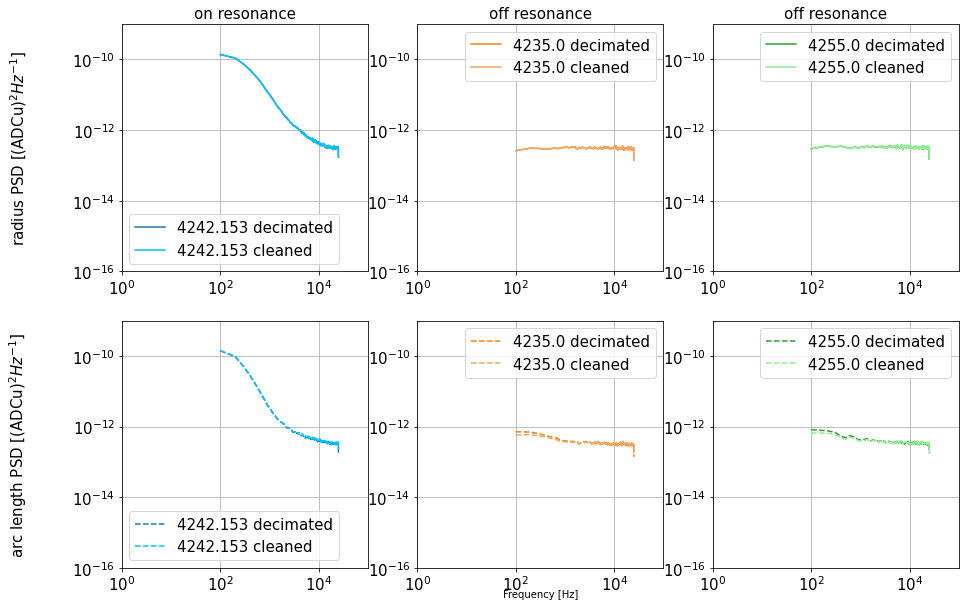

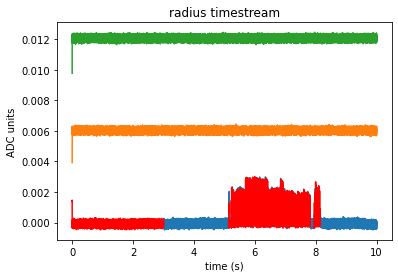

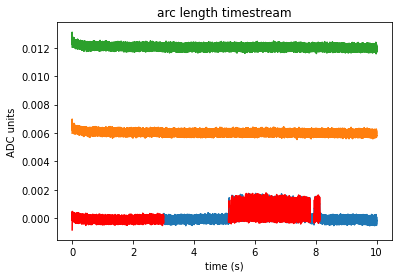

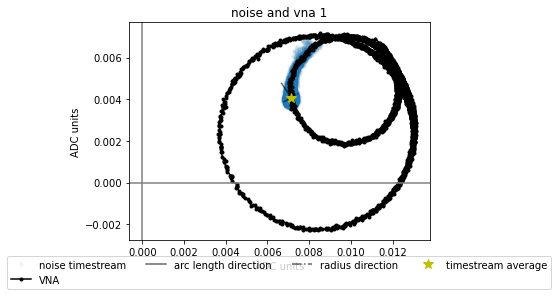

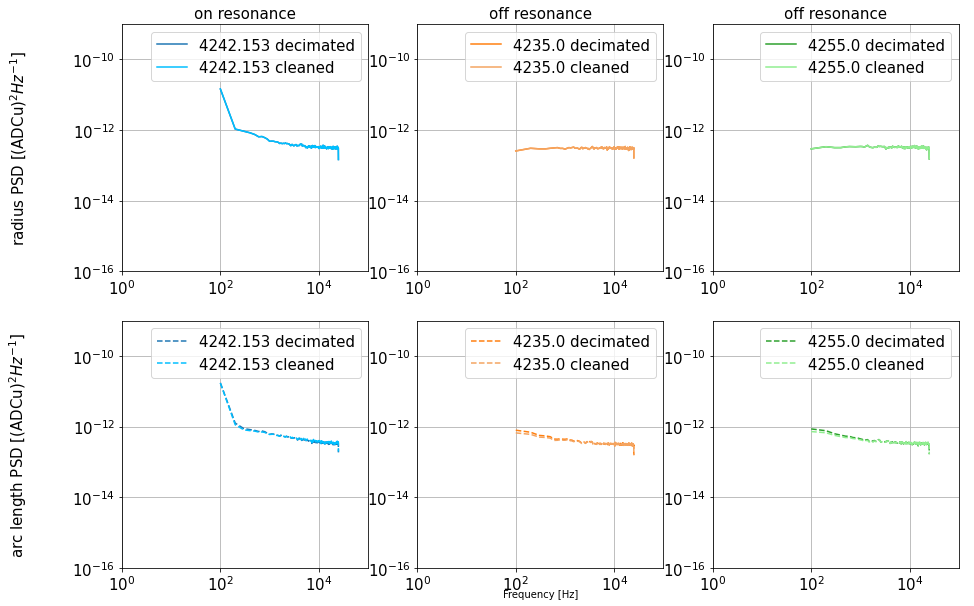

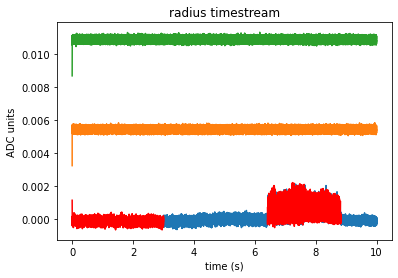

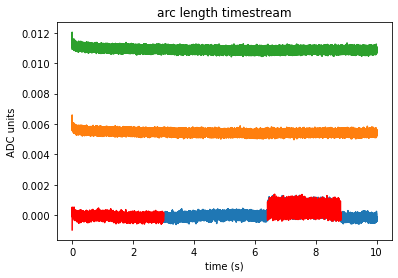

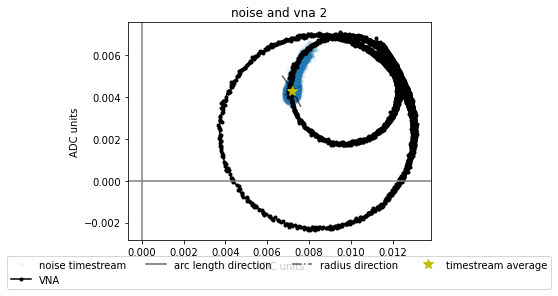

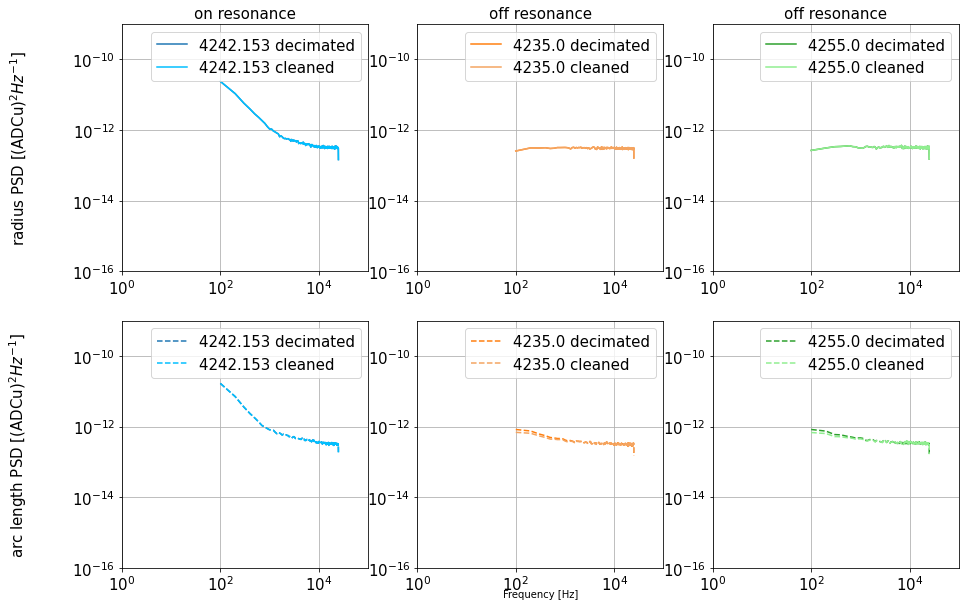

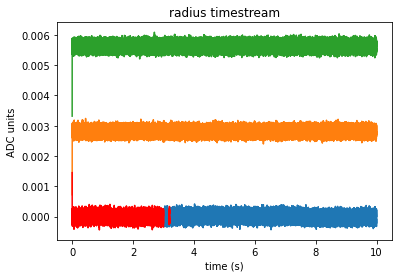

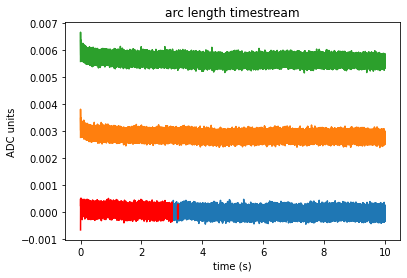

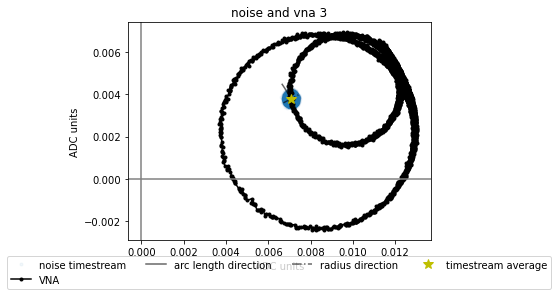

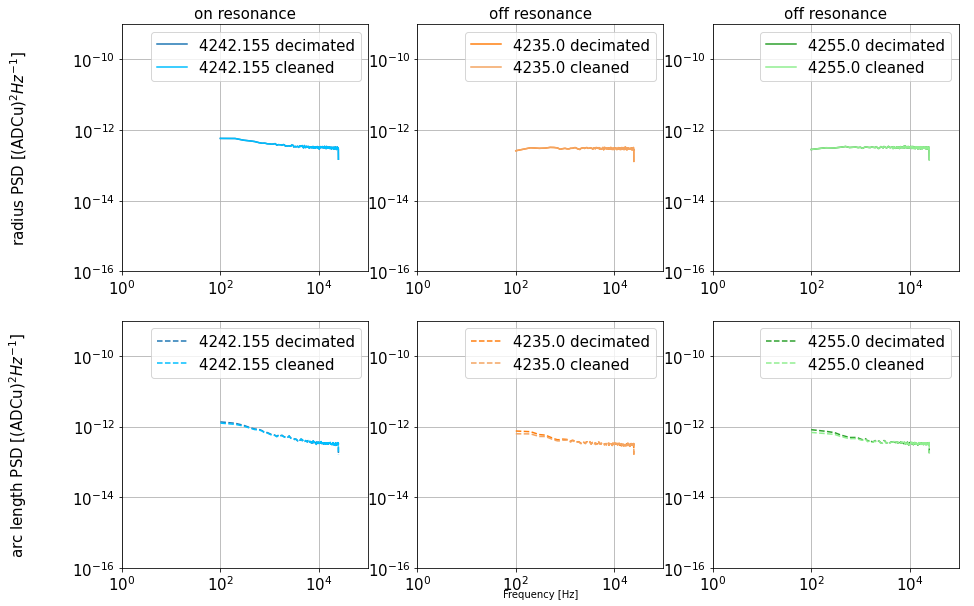

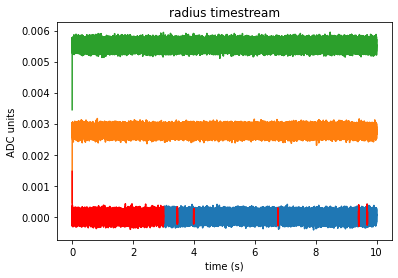

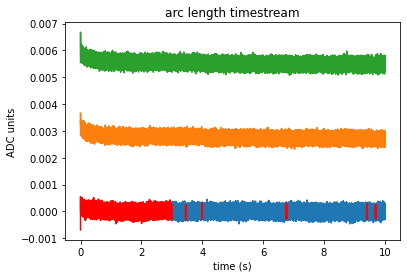

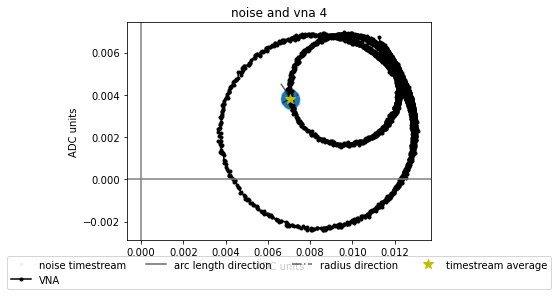

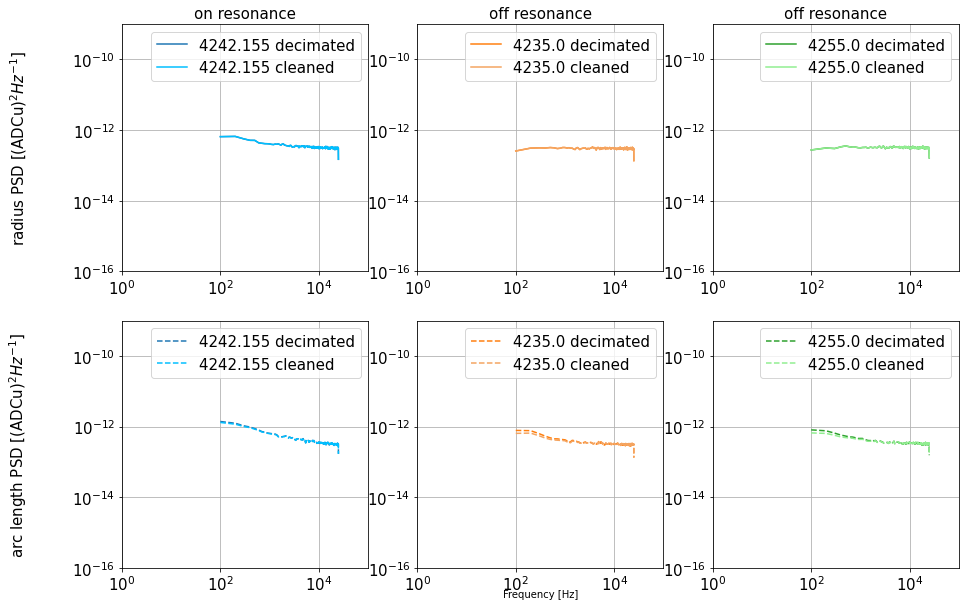

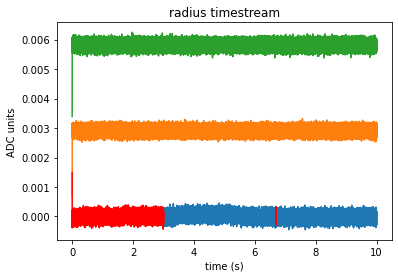

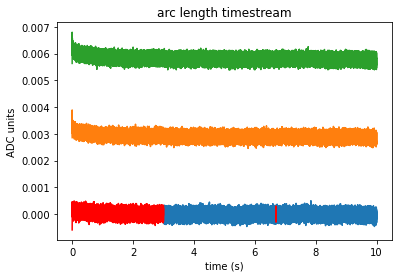

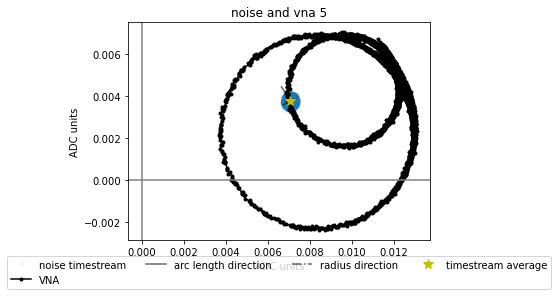

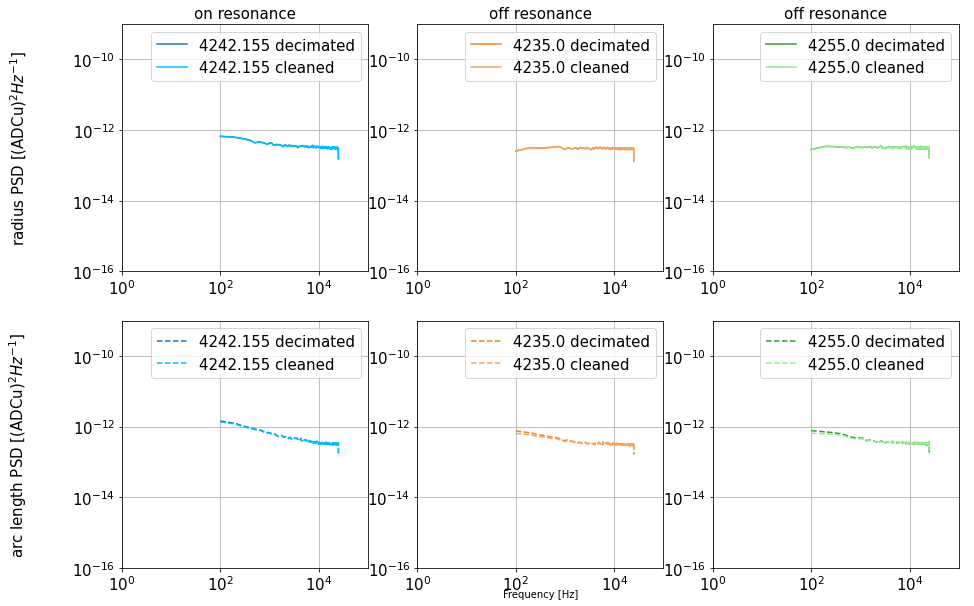

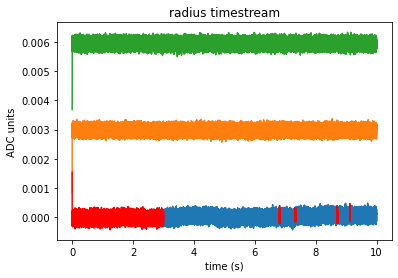

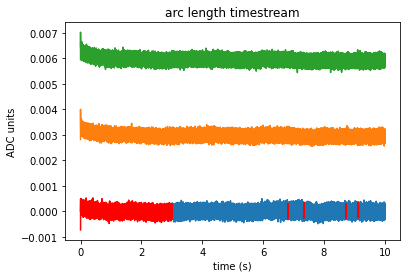

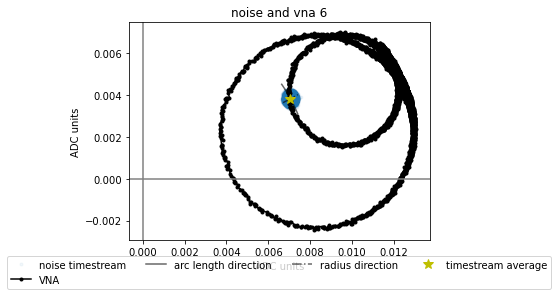

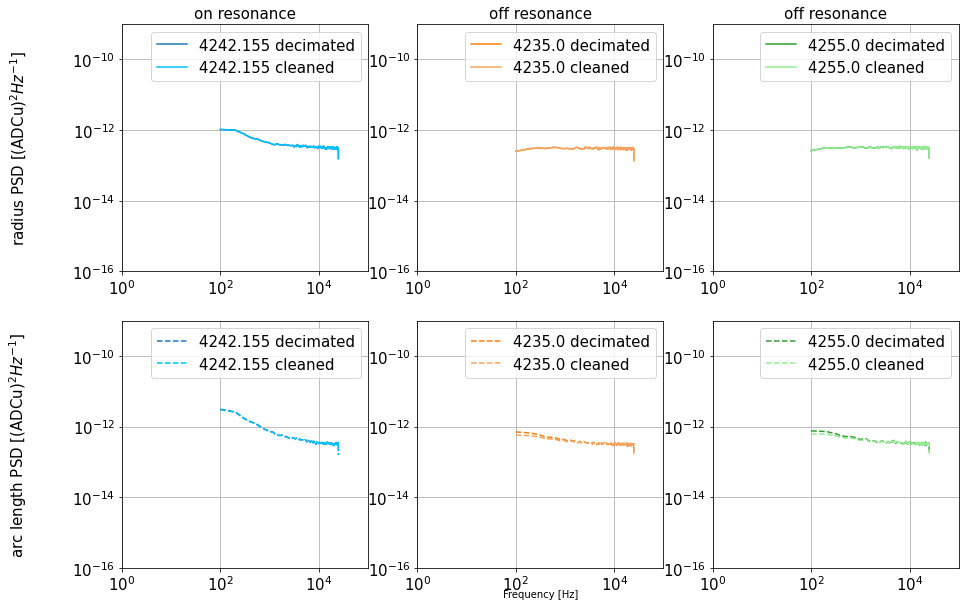

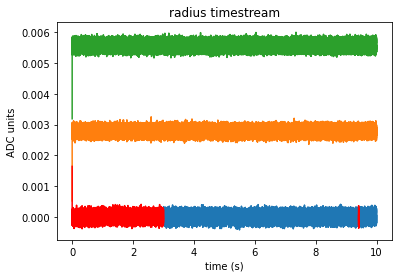

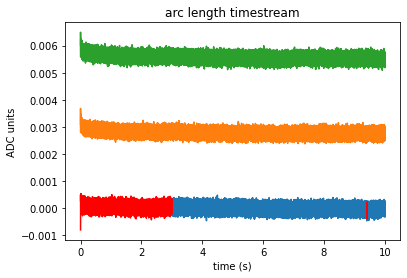

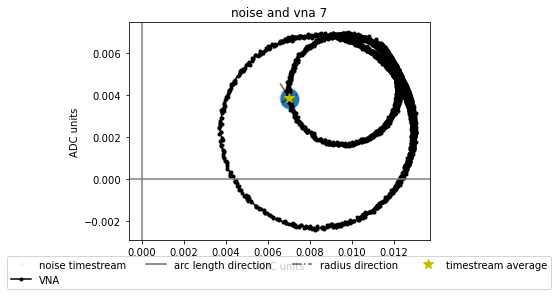

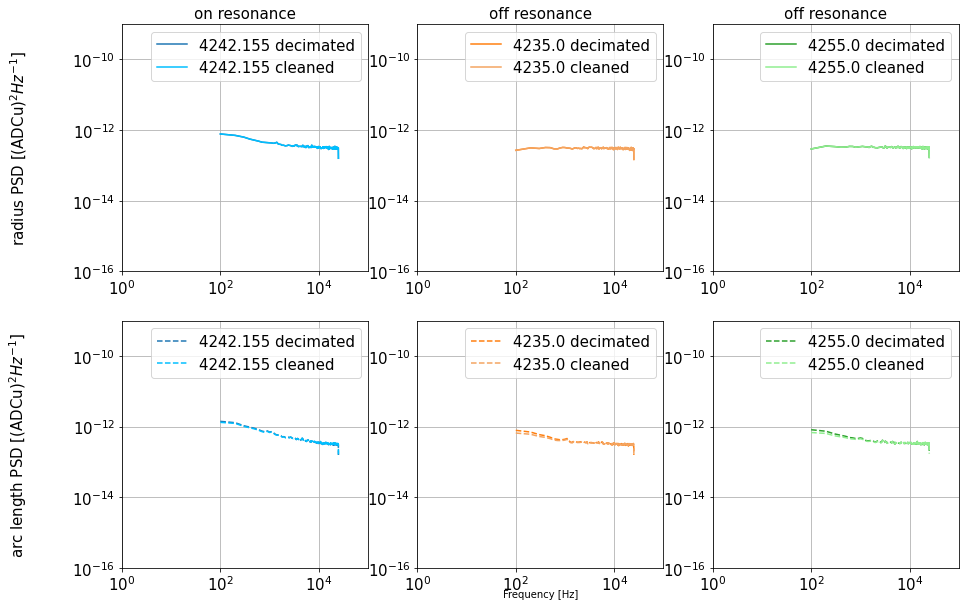

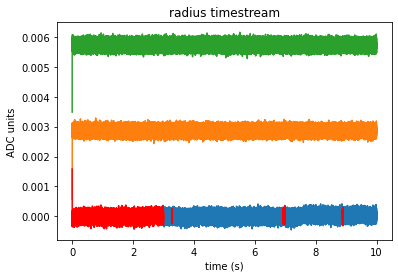

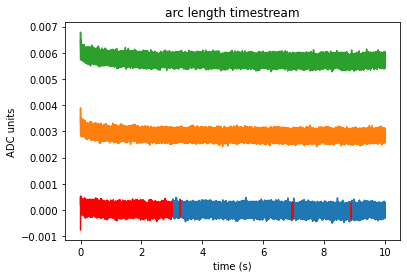

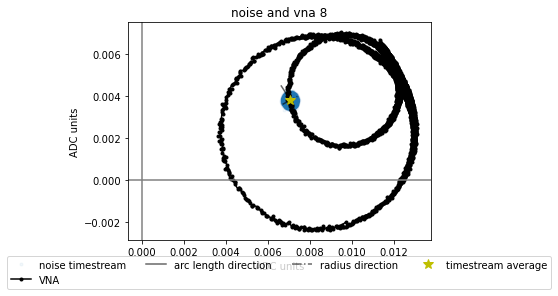

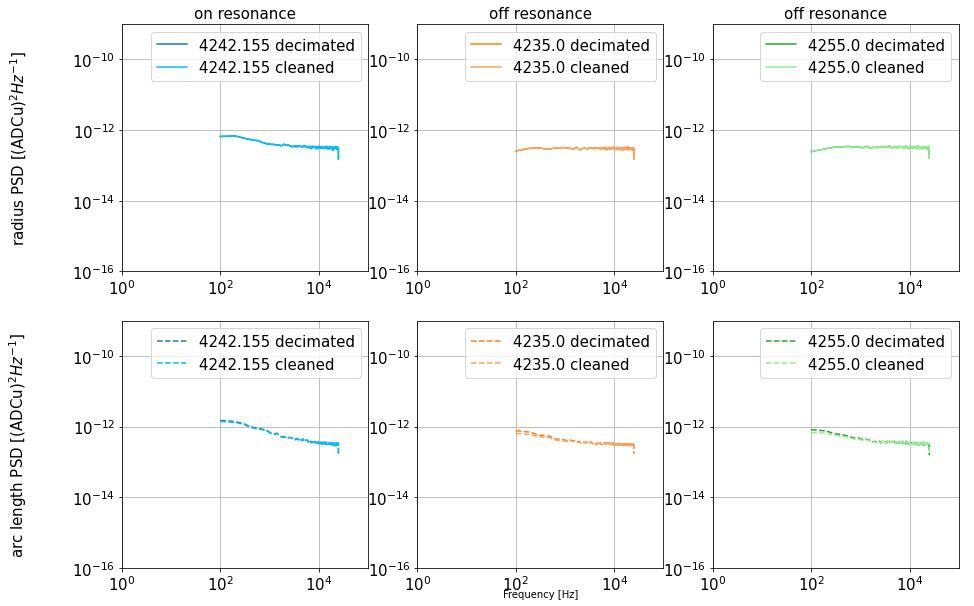

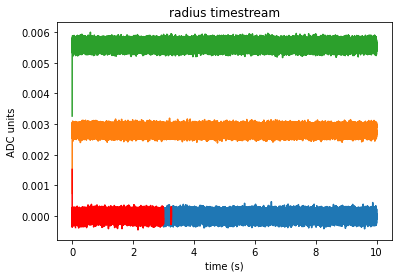

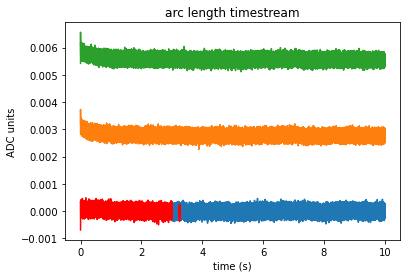

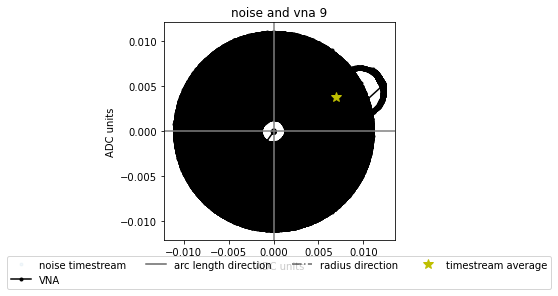

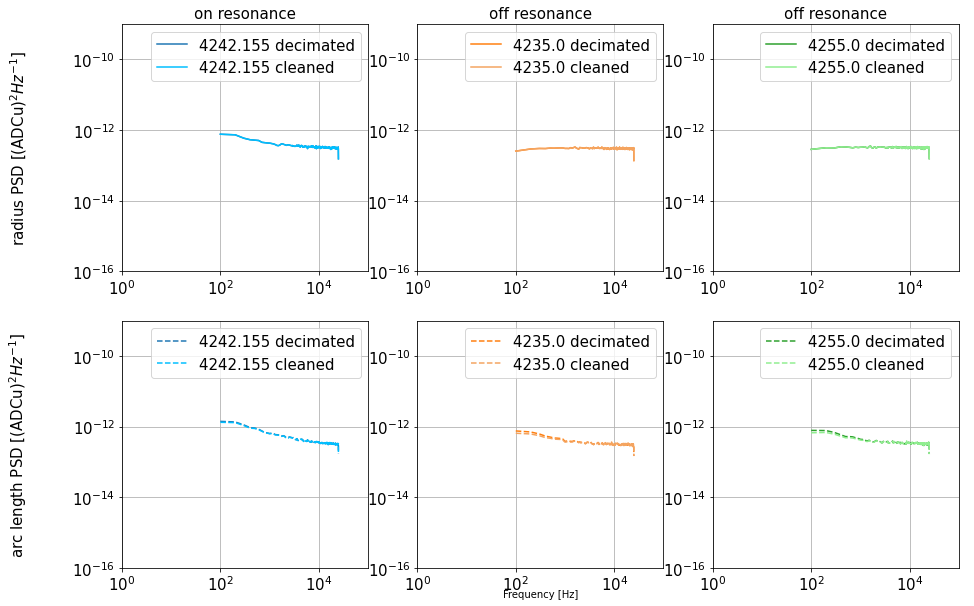

In [4]:
## PSD hi and lo frequency limits
chunk_up_to      = 1e2
decimate_down_to = 5e4

## Loop over every noise and VNA file
for i in np.arange(n_runs):
    noise_file = run_df["noise path"].iloc[i]
    vna_file   = run_df["vna path"].iloc[i]
    
    print('power:', run_df["power"].iloc[i])
    powers, PSDs, res, timestreams = Thf.CleanPSDs(noise_file, vna_file, i=i)
    
#     _, noise_info = PUf.unavg_noi(noise_file)
#     noise_total_time =  noise_info['time'][-1]
#     noise_fs = 1./noise_info['sampling period']
#     noise_readout_f = noise_info['search freqs'][0]

#     num_chunks = int(noise_total_time*chunk_up_to)
#     noise_decimation = int(noise_fs/decimate_down_to)

#     print('===================================')
#     print('will separate the data into  ' + str(num_chunks) +  ' chunks to achieve the requested '  + "{:.2e}".format(chunk_up_to) + ' lower end of the PSD')
#     print('===================================')
#     print('additional decimation by ' + str(noise_decimation) +  ' needed to achieve the requested ' + "{:.2e}".format(decimate_down_to) + ' upper end of the PSD')
#     print('===================================')


#     powers, PSDs, res, timestreams = Prf.PSDs_and_cleaning(noise_file,
#                                                            vna_file,
#                                                            extra_dec = noise_decimation,
#                                                            num_chunks=num_chunks,
#                                                            blank_chunks=int(num_chunks*0.3),
#                                                            removal_decimation = 1,
#                                                            )

## Pulse cleaning

In [5]:
reload(PUf)
decimate_down_to = 2.5e5
i = 0 
for NDF_pulse_files,noise_file,NDF_pulse_vna_file in zip(power_NDF_pulse_files,power_NDF_noise_files,power_NDF_noise_vna_files):
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`')
    print('power: ' + power_directories[i])
    for pulse_file,vna_file in zip(NDF_pulse_files,NDF_pulse_vna_files):
        print('===================')
        print('cleaning pulse file: ' + pulse_file)
        print('===================')

        pulse_noise, pulse_info = PUf.unavg_noi(pulse_file)
        pulse_fs = 1./pulse_info['sampling period']
        pulse_cleaning_decimation = int(pulse_fs/decimate_down_to)

        print('loaded pulse data')
        print('===================')

        pulse_noise = Prf.average_decimate(pulse_noise,pulse_cleaning_decimation)
        pulse_fs /= pulse_cleaning_decimation
        print('decimated data by ' + str(pulse_cleaning_decimation) + ' to achieve requested upper bound of ' + '{:2e}'.format(decimate_down_to) + ' Hz' )
        print('===================')

        samples_per_pulse = int(2e-3*pulse_fs)


        idcs_keep = np.zeros(int(num_pulses*samples_per_pulse),dtype=int)
        for pulse_i in range(int(num_pulses)):
        #     print(pulse_i)
            pulse_idx_start = int(pulse_i*samples_per_pulse)
            pulse_idx_end = int((pulse_i+1)*samples_per_pulse)
        #     print(pulse_idx_start,pulse_idx_end)
            # print(np.arange(pulse_idx_start*2+samples_per_pulse,pulse_idx_end*2,1))
        #     print(pulse_idx_start*2+samples_per_pulse,pulse_idx_end*2)
            left_window_edge = int(pulse_idx_start*2+0.9*samples_per_pulse)
            right_window_edge = int(pulse_idx_end*2-0.1*samples_per_pulse)
            pulse_idx_list = np.arange(left_window_edge,right_window_edge,1,dtype=int)
        #     print(pulse_idx_list[0],pulse_idx_list[-1])
            idcs_keep[pulse_idx_start:pulse_idx_end] = pulse_idx_list

        noise_averages = np.mean(pulse_noise[idcs_keep,:],axis=0,dtype="complex128")
        radius_averages = abs(noise_averages)
        angle_averages = np.angle(noise_averages)
        print(radius_averages)
        print(angle_averages)

        pulse_timestream_rotated = pulse_noise*np.exp(-1j*angle_averages)
        angle_timestream = np.angle(pulse_timestream_rotated)

        radius = abs(pulse_noise) - radius_averages
        arc = angle_timestream*radius_averages

        radius_clean = np.zeros(radius.shape)
        arc_clean = np.zeros(arc.shape)

        print('built radius and arc length timestreams given by quiescent point')
        print('===================')

        print(noise_file)
        _,data_info = PUf.clean_noi(noise_file[:-3]+'_cleaned.h5')

        for t in range(radius.shape[1]):
            radius_coefficient = data_info['radius cleaning coefficient'][t]
            arc_coefficient = data_info['arc cleaning coefficient'][t]

            if t == 0:
                off_tone_idcs = [1,2]
            elif t == 1:
                off_tone_idcs = [2]
            elif t == 2:
                off_tone_idcs = [1]


            off_tone_radius = np.mean(radius[:,off_tone_idcs],axis=1,dtype=np.float64)
            radius_clean[:,t]= radius[:,t] - radius_coefficient*off_tone_radius

            off_tone_arc = np.mean(arc[:,off_tone_idcs],axis=1,dtype=np.float64)
            arc_clean[:,t] = arc[:,t] - arc_coefficient*off_tone_arc

            print('cleaned tone ' + str(t))
            print('===================')

    #     print(np.mean(radius_clean))
        radius_clean -= np.mean(radius_clean,axis=0,dtype='float64')
        arc_clean -= np.mean(arc_clean,axis=0,dtype='float64')
    #     print(np.mean(radius_clean))
    #     print(radius_averages.shape, radius_clean.shape)
    #     data_clean = (radius_averages+radius_clean)#*np.exp(1j*((arc_clean/radius_averages)+angle_averages))
        # data_clean = (np.mean(abs(data_raw),axis=0,dtype=np.float64)+cd1_clean)*np.exp(1j*((cd2_clean/np.mean(abs(data_raw),axis=0,dtype=np.float64))+np.angle(np.mean(data_raw,axis=0,dtype=complex))))
        # print(cd1_coeff)

    #     data_clean_average = np.mean(data_clean,dtype='float64')
    #     print(abs(data_clean_average))
    #     print(np.angle(data_clean_average))

        pulse_noise_clean = Prf.save_clean_timestreams(pulse_file,\
                                                       radius_averages,\
                                                       angle_averages,\
                                                       radius_clean,\
                                                       arc_clean,\
                                                       pulse_fs,\
                                                       timestreams['radius coefficient'],\
                                                       timestreams['arc coefficient'],\
                                                       override=True)
    i += 1


NameError: name 'reload' is not defined